# Analisis Productos de Exportación Colombia


![](https://d41chssnpqdne.cloudfront.net/0-image_tools/43937383/task_f22b2e74-7433-4323-b36f-687440224489/avHDE.jpg?Expires=1745712008&Signature=llOeAL3bLkznH3BFddyq9hzCA3NKk8hrBxjwYbmjXr8fWFGSvzeXMYkU8TghNbnkHQNIB4JY3iXMp9B8FqcSWSMf7kQxvaeoG46ebU0nuSyjG~2WJVwLdbj7jIp~ryY1fRK2UJ09LohsLLNhzfugblwdkcjuFBTETn~pWHzuidYFU3n7J33sYVHInJdTmvoaBgb4RKXpSEBrkWJCCk9QVYWRrlpG2AYMq9LuQSZRRovYYZhHQX67ik~VXir5wcff-31Z~CaZLNzQoR9x3ZUjEv5LeZSLCfwA0y3oNpn6~jQUgVwcHZMjV9KauyRM9qftSgLGFyVptK54VHgwtlue9A__&Key-Pair-Id=K3USGZIKWMDCSX)

# ingles
# About Dataset
## Exportaciones Agrícolas tracionales y no tradicionales
Este conjunto de datos contiene información completa sobre los productos de exportación tradicionales y no tradicionales de Colombia. Es ideal para productores, agricultores y entusiastas del aprendizaje automático que estén interesados ​​en explorar las tendencias y características de las exportaciones colombianas.

Features of the Dataset\
Basic Track Information:

track_name: Name of the song.
artist(s)_name: Name of the artist(s) performing the song.
artist_count: Number of artists contributing to the song.
released_year, released_month, released_day: Release date details.

## Variables:
- Partida: Código de la partida arancelaria.
- Descripción Partida10 Dig: Descripción detallada del producto en la partida.
- Tradición productos: Indica si el producto es "Tradicional" o "No tradicional".
- Departamento: Departamento desde el cual se realiza la exportación.
- País: País de destino.
- Año: Año de la exportación.
- Mes: Mes de la exportación.
- Exportaciones en valor (Miles USD FOB): Valor de exportación en miles de dólares.
- Exportaciones en volumen (Toneladas): Volumen de exportación en toneladas.


Fuente: Datos Abiertos<div style="text-align: center; margin: 20px;">  
  <a href="https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Exportaciones-agr-colas-no-tradicionales-y-tradici/5fct-ib9u/about_data" target="_blank" style="font-size: 24px; font-weight: bold; color: blue;">Dataset Exporaciones</a>  
</div>


In [2]:
# @title Conexión con la base de datos desde una URL
# URL = 'https://drive.google.com/file/d/1SOM9FVecFfuGWsDzMYxtTs1AoOjkPcF0/view?usp=drive_link'
# Definir el ID del archivo de Google Drive
FILEID = '1SOM9FVecFfuGWsDzMYxtTs1AoOjkPcF0'
nombre_archivo = 'Exportaciones.csv'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "Exportaciones.csv" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2024-11-04 13:49:42--  https://docs.google.com/uc?export=download&confirm=&id=1SOM9FVecFfuGWsDzMYxtTs1AoOjkPcF0
Resolving docs.google.com (docs.google.com)... 209.85.145.138, 209.85.145.139, 209.85.145.101, ...
Connecting to docs.google.com (docs.google.com)|209.85.145.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SOM9FVecFfuGWsDzMYxtTs1AoOjkPcF0&export=download [following]
--2024-11-04 13:49:42--  https://drive.usercontent.google.com/download?id=1SOM9FVecFfuGWsDzMYxtTs1AoOjkPcF0&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66838710 (64M) [application/octet-stream]
Saving to: ‘Exportaciones.csv’

Exportaciones.csv   100%[===================>]  63.74M  8

# Desglose:

- **FILEID =** **'1RXbptbwk6z1vbqqB5chvs6_JROb-or8D'**: El ID del archivo de Google Drive que se desea descargar.
- Primera llamada wget:
Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
Usa sed para buscar y extraer el token de la respuesta de Google Drive.
- Segunda llamada wget:
Con el token, se realiza la descarga final del archivo.\
rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.

In [3]:
# @title Instalar librerias a usar
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 19.9 MB/s eta 0:00:00


In [4]:
# @title Carga de librerias
# Bibliotecas utilizadas
# ----------------------------------------------------------------------------
# pandas (pd): librería para el análisis de datos
# matplotlib (plt): librería para crear gráficos
# seaborn (sns): librería para visualizar datos de manera estética
# Sweetviz (sw): Una biblioteca de análisis y visualización de datos en Python.
# files : Importa la función para subir y descargar archivos en Google Colab.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw
from google.colab import files
import numpy as np

In [5]:
# @title Cargamos las funciones relacionadas
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)


# Sección 1

### Paso 1: Cargar el archivo CSV

In [6]:
# @title Cargar el archivo CSV de canciones de Spotify
file_path = 'Exportaciones.csv'
Exportaciones_df = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de Exportaciones:")
Exportaciones_df.head()


Primeras 5 filas de los datos de Exportaciones:


,Partida,Descripcion Partida10 Dig,Tradición productos,Departamento,Pais,Año,Mes,Exportaciones en valor (Miles USD FOB),Exportaciones en volumen (Toneladas)
0,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2019,Abril,0,0
1,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2020,Febrero,0,0
2,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Enero,0,0
3,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Abril,0,0
4,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2023,Junio,0,0


In [7]:
#Extraer solo una columna
Exportaciones_df['Pais']


,Pais
0,China
1,China
2,China
3,China
4,China
...,...
475780,Suiza
475781,Ecuador
475782,República Dominicana
475783,China


In [8]:
#Extraer más de una columna [[]]
Exportaciones_df[['Pais','Año','Partida']]

,Pais,Año,Partida
0,China,2019,101210000
1,China,2020,101210000
2,China,2022,101210000
3,China,2022,101210000
4,China,2023,101210000
...,...,...,...
475780,Suiza,2023,5302900000
475781,Ecuador,2020,5302900000
475782,República Dominicana,2020,5302900000
475783,China,2022,5302900000


In [9]:
# @title Visualización de composición de la base de datos.
Exportaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475785 entries, 0 to 475784
Data columns (total 9 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Partida                                 475785 non-null  int64 
 1   Descripcion Partida10 Dig               475785 non-null  object
 2   Tradición productos                     475785 non-null  object
 3   Departamento                            475785 non-null  object
 4   Pais                                    475785 non-null  object
 5   Año                                     475785 non-null  int64 
 6   Mes                                     475785 non-null  object
 7   Exportaciones en valor (Miles USD FOB)  475785 non-null  int64 
 8   Exportaciones en volumen (Toneladas)    475785 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 32.7+ MB


### Paso 2: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío.

In [10]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {Exportaciones_df.shape}")

Forma de los datos (filas, columnas): (475785, 9)


In [11]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(Exportaciones_df.dtypes)


Tipos de datos por columna:
Partida                                    int64
Descripcion Partida10 Dig                 object
Tradición productos                       object
Departamento                              object
Pais                                      object
Año                                        int64
Mes                                       object
Exportaciones en valor (Miles USD FOB)     int64
Exportaciones en volumen (Toneladas)       int64
dtype: object


In [12]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(Exportaciones_df.nunique())



Valores únicos por columna:
Partida                                   1180
Descripcion Partida10 Dig                 1169
Tradición productos                          2
Departamento                                34
Pais                                       223
Año                                          6
Mes                                         12
Exportaciones en valor (Miles USD FOB)    5368
Exportaciones en volumen (Toneladas)      4075
dtype: int64


In [13]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(Exportaciones_df.dtypes)


Tipos de datos por columna:
Partida                                    int64
Descripcion Partida10 Dig                 object
Tradición productos                       object
Departamento                              object
Pais                                      object
Año                                        int64
Mes                                       object
Exportaciones en valor (Miles USD FOB)     int64
Exportaciones en volumen (Toneladas)       int64
dtype: object


In [14]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(Exportaciones_df.isnull().sum())



Datos faltantes por columna:
Partida                                   0
Descripcion Partida10 Dig                 0
Tradición productos                       0
Departamento                              0
Pais                                      0
Año                                       0
Mes                                       0
Exportaciones en valor (Miles USD FOB)    0
Exportaciones en volumen (Toneladas)      0
dtype: int64


In [15]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(Exportaciones_df)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,Partida,475785,1180,0,0.0,475785
1,Descripcion Partida10 Dig,475785,1169,0,0.0,475785
2,Tradición productos,475785,2,0,0.0,475785
3,Departamento,475785,34,0,0.0,475785
4,Pais,475785,223,0,0.0,475785
5,Año,475785,6,0,0.0,475785
6,Mes,475785,12,0,0.0,475785
7,Exportaciones en valor (Miles USD FOB),475785,5368,0,0.0,475785
8,Exportaciones en volumen (Toneladas),475785,4075,0,0.0,475785


In [16]:
# @title Realizamos la descriptiva estadística
#Extraer solo una columna
Exportaciones_df['Descripcion Partida10 Dig'].describe()

,Descripcion Partida10 Dig
count,475785
unique,1169
top,"Los demás cafés sin tostar, sin descafeinar"
freq,15946


### Paso 3: Graficar distribuciones


Ahora, vamos a generar gráficos para visualizar algunas características de las exportaciones, como la región desde donde provienen

In [17]:
# prompt: tomando la variable de Exportaciones_df denotando la columna 'Departamento', necesito una función que me indique en una nueva columna la región a la que pertenece ese departamento

def asignar_region(departamento):
  """
  Asigna la región a la que pertenece un departamento.

  Args:
      departamento (str): El nombre del departamento.

  Returns:
      str: La región a la que pertenece el departamento, o None si no se encuentra.
  """

  regiones = {
    'Amazonas': 'Amazonía',
    'Antioquia': 'Andina',
    'Arauca': 'Orinoquía',
    'Atlántico': 'Caribe',
    'Bolívar': 'Caribe',
    'Boyacá': 'Andina',
    'Caldas': 'Andina',
    'Caquetá': 'Amazonía',
    'Casanare': 'Orinoquía',
    'Cauca': 'Pacífico',
    'Cesar': 'Caribe',
    'Chocó': 'Pacífico',
    'Córdoba': 'Caribe',
    'Cundinamarca': 'Andina',
    'Guainía': 'Amazonía',
    'Guaviare': 'Amazonía',
    'Huila': 'Andina',
    'La Guajira': 'Caribe',
    'Magdalena': 'Caribe',
    'Meta': 'Orinoquía',
    'Nariño': 'Pacífico',
    'Norte de Santander': 'Andina',
    'Putumayo': 'Amazonía',
    'Quindío': 'Andina',
    'Risaralda': 'Andina',
    'San Andrés y Providencia': 'Caribe',
    'Santander': 'Andina',
    'Sucre': 'Caribe',
    'Tolima': 'Andina',
    'Valle del Cauca': 'Pacífico',
    'Vaupés': 'Amazonía',
    'Vichada': 'Orinoquía',
    'Bogotá': 'Andina',
  }

  return regiones.get(departamento)

# Aplica la función a la columna 'Departamento' y crea una nueva columna 'Región'
Exportaciones_df['Región'] = Exportaciones_df['Departamento'].apply(asignar_region)

In [18]:
# prompt: Imprimir los valores únicos de la columna Descripción Partida10 Dig

# Imprimir los valores únicos de la columna 'Descripción Partida10 Dig'
valores_unicos_descripcion = Exportaciones_df['Descripcion Partida10 Dig'].unique()
valores_unicos_descripcion

array(['Caballos reproductores de raza pura, vivos',
       'Los demás caballos, vivos', 'Asnos vivos', ...,
       'Estopas y desperdicios, de lino (incluidos los desperdicios de hilados y las hilachas)',
       'Cáñamo (cannabis sativa l ) en bruto o enriado, pero sin hilar',
       'Estopas y desperdicios de cáñamo (incluidos los desperdicios de hilados y las hilachas)'],
      dtype=object)

In [19]:
Exportaciones_df['Descripcion Partida10 Dig']

,Descripcion Partida10 Dig
0,"Caballos reproductores de raza pura, vivos"
1,"Caballos reproductores de raza pura, vivos"
2,"Caballos reproductores de raza pura, vivos"
3,"Caballos reproductores de raza pura, vivos"
4,"Caballos reproductores de raza pura, vivos"
...,...
475780,Estopas y desperdicios de cáñamo (incluidos lo...
475781,Estopas y desperdicios de cáñamo (incluidos lo...
475782,Estopas y desperdicios de cáñamo (incluidos lo...
475783,Estopas y desperdicios de cáñamo (incluidos lo...


In [20]:
Exportaciones_df.Región.value_counts()

,count
Región,
Andina,361033
Pacífico,63056
Caribe,48876
Orinoquía,1171
Amazonía,97


In [21]:
# @title Visualización de cantidad de exportaciones por departamento
Exportaciones_df['Exportaciones en valor (Miles USD FOB)'].value_counts(ascending=False)
Exportaciones_df['Departamento'].value_counts(ascending=False)

,count
Departamento,
Bogotá,145371
Antioquia,89738
Cundinamarca,76144
Valle del Cauca,53985
Atlántico,24218
Santander,12191
Caldas,11873
Bolívar,10924
Risaralda,9449


In [22]:
Exportaciones_df.groupby(by=['Región', 'Departamento'])['Departamento'].count().unstack()

Departamento,Amazonas,Caquetá,Guainía,Guaviare,Putumayo,Vaupés,Antioquia,Bogotá,Boyacá,Caldas,...,San Andrés y Providencia,Sucre,Arauca,Casanare,Meta,Vichada,Cauca,Chocó,Nariño,Valle del Cauca
Región,,,,,,,,,,,,,,,,,,,,,
Amazonía,11.0,7.0,1.0,5.0,70.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andina,NaN,NaN,NaN,NaN,NaN,NaN,89738.0,145371.0,2209.0,11873.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caribe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.0,2367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orinoquía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,60.0,1097.0,1.0,NaN,NaN,NaN,NaN
Pacífico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4717.0,106.0,4248.0,53985.0


In [23]:
# prompt: ayudame con una función para visualizar una grafica que permita ver en un mapa de calor donde relacione la tasa en las regiones y los departamentos,que cuente la cantidad de departamentos que hay en cada regíon

import plotly.express as px

# Agrupa los datos por región y departamento, contando la cantidad de departamentos en cada región
heatmap_data = Exportaciones_df.groupby(['Región', 'Departamento'])['Departamento'].count().unstack()#.fillna(0)

# Crea el mapa de calor usando Plotly
fig = px.imshow(heatmap_data,
                labels=dict(x="Departamento", y="Región"),
                x=heatmap_data.columns,
                y=heatmap_data.index,
                color_continuous_scale='Viridis',
                title="Mapa de Calor: Valor FOB por Región y Departamento")

fig.update_layout(width=1000, height=600)

fig.show()

In [24]:
# @title seleccionamos los 10 primeros
Cantidad_de_productos_exportacion = 20
Exportaciones_df['Descripcion Partida10 Dig'].value_counts(ascending=False).iloc[:Cantidad_de_productos_exportacion]


,count
Descripcion Partida10 Dig,
"Los demás cafés sin tostar, sin descafeinar",15946
"Los demás claveles frescos, cortados para ramos o adornos",7683
"Rosas frescas, cortadas para ramos o adornos",7282
"Bombones, caramelos, confites y pastillas",6376
"Las demás flores y capullos frescos, cortados para ramos o adornos",6282
"Alstroemerias frescas, cortadas para ramos o adornos",5745
"Claveles miniatura frescos, cortados para ramos o adornos",5737
Hortensias (Hydrangea spp) frescas,5576
Los demás chocolates y demás preparaciones alimenticias que contengan cacao,5197


In [1]:
# Extract unique values of 'Partida' and segment them into HS levels
unique_partida = Exportaciones_df['Partida'].astype(str).unique() # Convert 'Partida' to string

# Create a DataFrame to display unique segments for each level
unique_segments = pd.DataFrame(unique_partida, columns=['Partida'])
unique_segments['HS_Capitulo'] = unique_segments['Partida'].str[:2]
unique_segments['HS_Partida'] = unique_segments['Partida'].str[:4]
unique_segments['HS_Subpartida'] = unique_segments['Partida'].str[:6]

# Drop duplicates to get unique values at each level of segmentation
unique_capitulo = unique_segments['HS_Capitulo'].unique()
unique_partida_level = unique_segments['HS_Partida'].unique()
unique_subpartida = unique_segments['HS_Subpartida'].unique()

# Display results
{
    "HS_Capitulo": unique_capitulo,
    "HS_Partida": unique_partida_level,
    "HS_Subpartida": unique_subpartida
}

NameError: name 'Exportaciones_df' is not defined

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Group data by region and calculate total export values
#region_exports = Exportaciones_df.groupby('Región')['Exportaciones en valor (Miles USD FOB)'].sum()

# Create the bar chart
#plt.figure(figsize=(10, 6))
#plt.bar(region_exports.index, region_exports.values, color='skyblue', edgecolor='black')
#plt.xlabel('Región')
#plt.ylabel('Total Export Value (Thousands USD FOB)')
#plt.title('Export Values by Region')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust layout for better spacing
#plt.show()

In [27]:
# @title seleccionamos los últimos 10
Producto = 15
Exportaciones_df['Descripcion Partida10 Dig'].value_counts(ascending=True).iloc[-Producto:]


,count
Descripcion Partida10 Dig,
Los demás artículos de confitería sin cacao (incluido el chocolate blanco),3980
Premezclas para la alimentación de los animales,4091
"Los demás frutos y partes comestibles de plantas, incluidas las mezclas, preparados o conservados de otro modo, incluso con adición de azúcar u otro edulcorante o alcohol, excepto las mezclas de la subpartida No 2008 19",4158
"FOLLAJE, HOJAS, RAMAS Y DEMÁS PARTES DE PLANTAS SIN FLORES NI CAPULLOS, Y HIERBAS, MUSGOS Y LINQUENES PARA RAMOS O ADORNADOS FRESCOS",4366
Galletas dulces (con adición de edulcorante),4902
Las demás preparaciones alimenticias no expresadas ni comprendidas en otra parte,4973
Los demás chocolates y demás preparaciones alimenticias que contengan cacao,5197
Hortensias (Hydrangea spp) frescas,5576
"Claveles miniatura frescos, cortados para ramos o adornos",5737


In [28]:


# Agrupar por 'Partida' y 'Descripción Partida10 Dig' y sumar los valores de 'Exportaciones en valor (Miles USD FOB)'
top_exports = Exportaciones_df.groupby(['Partida', 'Descripcion Partida10 Dig'])['Exportaciones en valor (Miles USD FOB)'].sum()

# Ordenar los valores en orden descendente y obtener los 5 más altos
top_5_exports = top_exports.sort_values(ascending=False).head(5)

top_5_exports

,,Exportaciones en valor (Miles USD FOB)
Partida,Descripcion Partida10 Dig,
901119000,"Los demás cafés sin tostar, sin descafeinar",16249333
803901100,"""Bananas o plátanos frescos del tipo """"cavendish valery"""" """,5141759
603199090,"Las demás flores y capullos frescos, cortados para ramos o adornos",4618356
1511100000,Aceite de palma en bruto,2096023
603110000,"Rosas frescas, cortadas para ramos o adornos",2062640


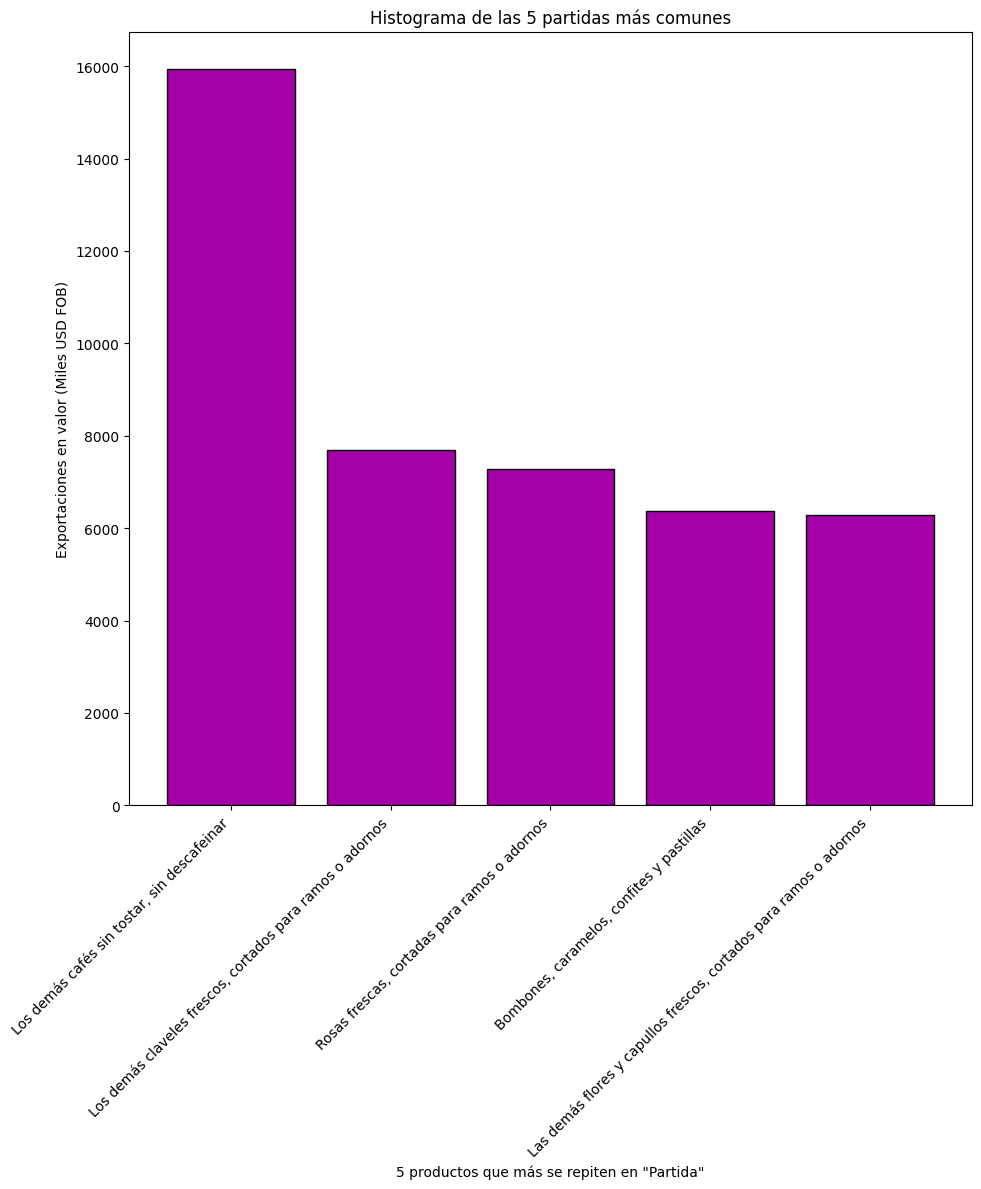

In [32]:
# prompt: Crear histograma en donde se muestren los 5 elementos que más se repiten en "Partida" . En plt.ylabel "Exportaciones en valor (Miles USD FOB)" y en plt.ylabel los 5 productos que más se repiten en "Partida"

# Agrupar por 'Partida' y contar las ocurrencias de cada partida
partida_counts = Exportaciones_df['Descripcion Partida10 Dig'].value_counts()

# Obtener las 5 partidas más comunes
top_5_partidas = partida_counts.head(5)

# Crear el histograma
plt.figure(figsize=(10, 12))
plt.bar(top_5_partidas.index, top_5_partidas.values, color='#a501a8', edgecolor='black')
plt.xlabel('5 productos que más se repiten en "Partida"')
plt.ylabel('Exportaciones en valor (Miles USD FOB)')
plt.title('Histograma de las 5 partidas más comunes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para mejor espaciado
plt.show()

4.

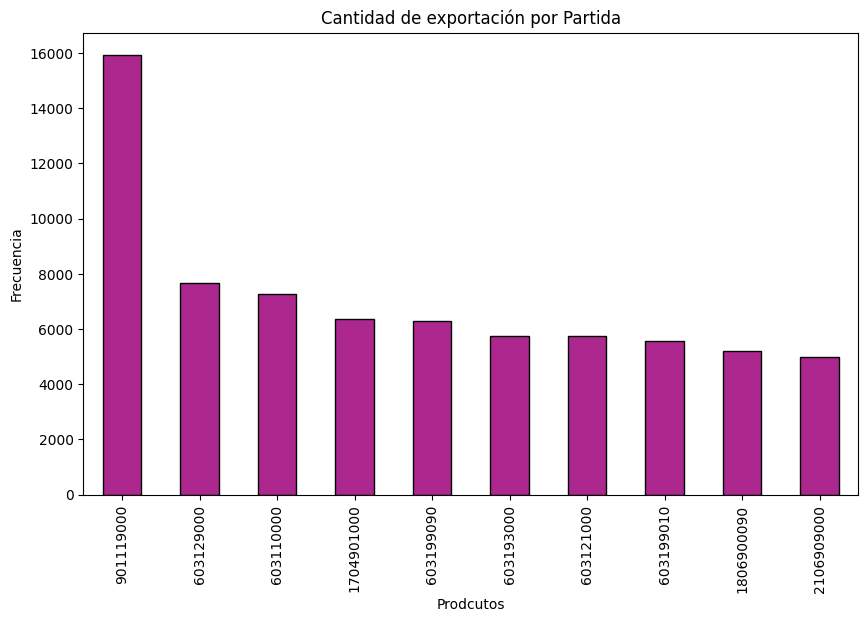

In [29]:
# @title Exportación por código de Partida
Partida = 10
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
Exportaciones_df['Partida'].value_counts().iloc[:Partida].plot(kind='bar', color='#AD288E', edgecolor='black')
plt.title('Cantidad de exportación por Partida')
plt.xlabel('Prodcutos')
plt.ylabel('Frecuencia')
plt.show()


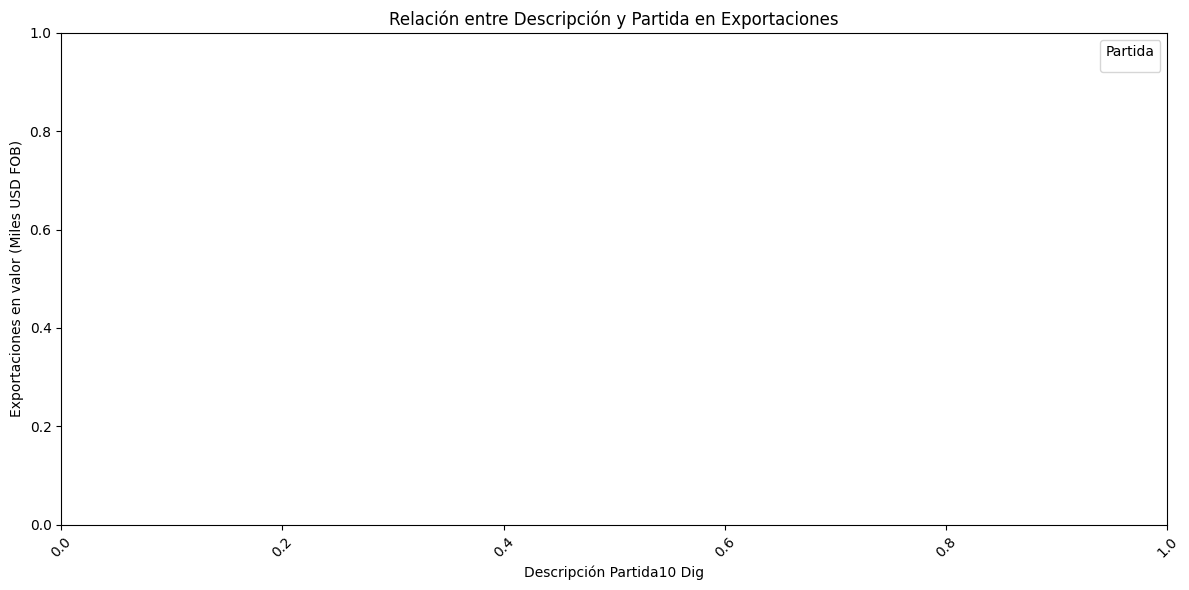

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que Exportaciones_df es tu DataFrame original
# Agrupar por 'Descripcion Partida10 Dig' y 'Partida' y sumar las exportaciones
grouped_data = Exportaciones_df.groupby(['Descripcion Partida10 Dig', 'Partida'])['Exportaciones en valor (Miles USD FOB)'].sum().reset_index()

# Obtener los 5 valores más repetidos de 'Descripcion Partida10 Dig'
top_5_descripcion = grouped_data['Descripcion Partida10 Dig'].value_counts().nlargest(5).index.tolist()

# Obtener los 5 valores más repetidos de 'Partida'
top_5_partida = grouped_data['Partida'].value_counts().nlargest(5).index.tolist()

# Filtrar el DataFrame para solo incluir los top 5
filtered_data = grouped_data[
    (grouped_data['Descripcion Partida10 Dig'].isin(top_5_descripcion)) &
    (grouped_data['Partida'].isin(top_5_partida))
]

# Graficar la relación
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Descripcion Partida10 Dig', y='Exportaciones en valor (Miles USD FOB)', hue='Partida', palette='viridis')
plt.title('Relación entre Descripción y Partida en Exportaciones')
plt.xlabel('Descripción Partida10 Dig')
plt.ylabel('Exportaciones en valor (Miles USD FOB)')
plt.xticks(rotation=45)
plt.legend(title='Partida')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Graficar la relación entre "Descripcion Partida10 Dig" y "Exportaciones en valor (Miles USD FOB)". mostrando Las 5 "Descripcion Partida10 Dig" que tienen mayor número en "Exportaciones en valor (Miles USD FOB)". Darle el color "#AD288E" con borde negro a las barras

# Agrupar por 'Descripcion Partida10 Dig' y sumar las exportaciones
grouped_data = Exportaciones_df.groupby('Descripcion Partida10 Dig')['Exportaciones en valor (Miles USD FOB)'].sum()

# Ordenar por exportaciones en orden descendente y obtener las 5 más altas
top_5_descripcion = grouped_data.sort_values(ascending=False).head(5)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_descripcion.index, top_5_descripcion.values, color='#AD288E', edgecolor='black')
plt.xlabel('Descripción Partida10 Dig')
plt.ylabel('Exportaciones en valor (Miles USD FOB)')
plt.title('Top 5 Descripcion Partida10 Dig con mayor Exportación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#@title Comportamiento de los 5 Productos más exportados por año
# prompt: Mostrar la relación que hay entre "Partida" y "Año", sólo con los 5 valores de "Partida" que más se repiten

# Agrupar por 'Partida' y 'Año' y contar las ocurrencias
partida_año_counts = Exportaciones_df.groupby(['Partida', 'Año'])['Año'].count()

# Obtener las 5 partidas más comunes
top_5_partidas = Exportaciones_df['Partida'].value_counts().head(5).index

# Filtrar los datos para incluir solo las 5 partidas más comunes
top_5_partida_año_counts = partida_año_counts[partida_año_counts.index.get_level_values('Partida').isin(top_5_partidas)]

# Crear un gráfico de barras para cada partida
plt.figure(figsize=(12, 8))
for partida in top_5_partidas:
  plt.plot(top_5_partida_año_counts[top_5_partida_año_counts.index.get_level_values('Partida') == partida].index.get_level_values('Año'),
           top_5_partida_año_counts[top_5_partida_año_counts.index.get_level_values('Partida') == partida].values,
           label=partida)

plt.xlabel('Año')
plt.ylabel('Cantidad de Exportaciones')
plt.title('Relación entre Partida y Año (Top 5 Partidas)')
plt.legend(title='Partida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Exportaciones_df['Productos'] = Exportaciones_df['Descripcion Partida10 Dig'].str.lower()

In [ ]:
# def categorizar_producto(lista_productos):
#     categorias = {
#         "frutas": ["manzana", "banana", "fresa"],
#         "vegetales": ["zanahoria", "lechuga", "tomate", 'cannabis'],
#         "flores": ["rosa", "tulipán", "margarita"],
#         "articulos para el hogar": ["cama", "silla", "mesa"],
#         "animales": ["caballos", "bovinos", "gallinas", "aves", "marinos", "vivos", "vivo", 'especi','animales', 'animal', 'raza', 'animalia', 'mar', 'insectos', 'insecto'],
#         "construcción": ["cemento", "ladrillo"],
#         "minerales": ["oro", "plata"],
#         "articulos de aseo": ["jabón", "champú"],
#         "medicamentos": ["aspirina", "paracetamol", 'sorbitol', 'dextrina', 'peptonas'],
#         "comida": ["carne", "pescado", "pollo", "leche", "queso", "huevo", 'cortes', 'costilla', 'refrigerados', 'gelatinas', 'pavo', 'cerdo', 'gallina', 'cordero', 'lacto', 'trucha', 'tocino', 'grasas', 'freca', 'frecas'],
#         "textiles":["lino","algodon","cuero", 'algodón', 'lana', 'pelo', 'cabello', 'peletería', 'pieles'],
#     }
#     for categoria, productos in categorias.items():
#         if any(producto in lista_productos for producto in productos):
#           # print(categoria)
#           return categoria
#     return "otros"

In [ ]:
# temporal = pd.DataFrame(Exportaciones_df['Productos'].unique().tolist(), columns=['Producto'])
# temporal['categoria'] = temporal.Producto.apply(categorizar_producto)

In [ ]:
# temporal['Categoria'] = temporal.Producto.apply(categorizar_producto)

In [ ]:
# temporal[temporal['Categoria']=='otros'].Producto

In [ ]:
# Exportaciones_df['Productos'][Exportaciones_df['Productos'].str.contains('cafe')]

In [ ]:
Exportaciones_df['Partida'] = Exportaciones_df['Partida'].astype(int)

In [ ]:
aa = Exportaciones_df['Partida'][0]
int(str(aa)[:2])

In [ ]:
import pandas as pd

# Definimos la función para clasificar la partida
def clasificar_partida(partida):
    # Obtener los primeros dos dígitos para identificar el capítulo
    capitulo = int(str(partida)[:2])

    # Diccionario de secciones con sus rangos de capítulos
    secciones = {
        "Sección 1": range(1, 6),
        "Sección 2": range(6, 15),
        "Sección 3": range(15, 16),
        "Sección 4": range(16, 25),
        "Sección 5": range(25, 28),
        "Sección 6": range(28, 39),
        "Sección 7": range(39, 41),
        "Sección 8": range(41, 44),
        "Sección 9": range(44, 47),
        "Sección 10": range(47, 50),
        "Sección 11": range(50, 64),
        "Sección 12": range(64, 68),
        "Sección 13": range(68, 71),
        "Sección 14": range(71, 72),
        "Sección 15": range(72, 84),
        "Sección 16": range(84, 86),
        "Sección 17": range(86, 90),
        "Sección 18": range(90, 93),
        "Sección 19": range(93, 94),
        "Sección 20": range(94, 97),
        "Sección 21": range(97, 98)
    }

    # Buscar la sección correspondiente al capítulo
    for seccion, rango in secciones.items():
        if capitulo in rango:
            return f"{seccion}"

    return "Capítulo no encontrado en las secciones definidas"

# Aplicamos la función a cada partida en el DataFrame
Exportaciones_df['Clasificacion'] = Exportaciones_df['Partida'].apply(clasificar_partida)


In [ ]:
# Aplicamos la función a cada partida en el DataFrame
Exportaciones_df['Clasificacion'].value_counts()

In [ ]:
int(Exportaciones_df.Partida[0])

In [ ]:
type(Exportaciones_df.Partida[0])

In [ ]:
# prompt: Crear Histograma seleccionando los 10 "Descripcion Partida10 Dig" que más se repiten relacionándolos con la región de donde se exportan y dale colores en diferentes saturaciones contrastantes del color "a501a8"

# Agrupar por 'Descripcion Partida10 Dig' y 'Región' y contar las ocurrencias
descripcion_region_counts = Exportaciones_df.groupby(['Descripcion Partida10 Dig', 'Región'])['Región'].count()

# Obtener las 10 descripciones más comunes
top_10_descripciones = Exportaciones_df['Descripcion Partida10 Dig'].value_counts().head(10).index

# Filtrar los datos para incluir solo las 10 descripciones más comunes
top_10_descripcion_region_counts = descripcion_region_counts[descripcion_region_counts.index.get_level_values('Descripcion Partida10 Dig').isin(top_10_descripciones)]

# Crear un histograma para cada descripción
plt.figure(figsize=(12, 8))
color_base = '#a501a8'
saturation_levels = np.linspace(0.2, 1, len(top_10_descripciones))

for i, descripcion in enumerate(top_10_descripciones):
  region_counts = top_10_descripcion_region_counts[top_10_descripcion_region_counts.index.get_level_values('Descripcion Partida10 Dig') == descripcion]

  # Crear un color con diferente saturación
  color = sns.light_palette(color_base, input="hex", as_cmap=True)(saturation_levels[i])


  plt.bar(region_counts.index.get_level_values('Región'),
           region_counts.values,
           label=descripcion,
           color=color)


plt.xlabel('Región')
plt.ylabel('Cantidad de Exportaciones')
plt.title('Histograma de las 10 descripciones más comunes por Región')
plt.legend(title='Descripción Partida10 Dig')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: Crear Histograma seleccionando los 5 "Descripcion Partida10 Dig" que más se repiten y relacionándolos con valores mayores de "Exportaciones en volumen (Toneladas)"

# Agrupar por 'Descripcion Partida10 Dig' y sumar las exportaciones en volumen
grouped_data = Exportaciones_df.groupby('Descripcion Partida10 Dig')['Exportaciones en volumen (Toneladas)'].sum()

# Ordenar por exportaciones en volumen en orden descendente y obtener las 5 más altas
top_5_descripcion_volumen = grouped_data.sort_values(ascending=False).head(5)

# Crear la gráfica de barras
plt.figure(figsize=(20, 10))
plt.bar(top_5_descripcion_volumen.index, top_5_descripcion_volumen.values, color='#AD288E', edgecolor='black')
plt.xlabel('Descripción Partida10 Dig')
plt.ylabel('Exportaciones en volumen (Toneladas)')
plt.title('Top 5 Descripcion Partida10 Dig con mayor Exportación en Volumen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = Exportaciones_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

In [ ]:
#@title visualizar la varianza de las variables numericas con numeric_cols.var() en barras y en linea juntas

# Calcular la varianza de las columnas numéricas
variance = numeric_cols.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 10))
plt.bar(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Barras)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Línea)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# @title graficas para variables numéricas lo siguiente sns.pairplot(tips) y que seleccione una cantidad de variables con mayor variación

# Seleccionar las columnas numéricas con mayor varianza
# numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el pairplot con Seaborn para las columnas seleccionadas
sns.pairplot(numeric_cols)
plt.suptitle('Pairplot de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


In [ ]:
# @title como seleccionar los artistas con más canciones
spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].index.tolist()

In [ ]:
# @title Grafica de Boxplot composición de la base de datos
plt.figure(figsize=(10, 6))
# Seleccionar los cantantes con mayor cantidad de canciones
nombres_artistas = spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].index.tolist()

sns.boxplot(x='artist(s)_name', y='bpm', data=spotify_df[spotify_df['artist(s)_name'].isin(nombres_artistas)])
plt.title('Boxplot de Artistas vs. bpm')
plt.xlabel('Artistas')
plt.ylabel('bpm')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = spotify_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
conf_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
conf_matrix


In [ ]:
# @title Visualización de la correlación entre variables numéricas
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Spotify'
advert_report = sw.analyze([spotify_df, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_spotify.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_spotify.html')

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

In [ ]:
# Visualizando la variación del bpm
spotify_df.bpm.describe()

In [ ]:
#@title Calcular la media de la columna 'bpm'
media_bpm = spotify_df.bpm.mean()

# Seleccionar registros por encima de la media
registros_encima_media = spotify_df[spotify_df.bpm > media_bpm]

# Seleccionar registros por debajo de la media
registros_debajo_media = spotify_df[spotify_df.bpm < media_bpm]

# Mostrar la cantidad de registros en cada grupo
print(f"Registros por encima de la media: {len(registros_encima_media)}")
print(f"Registros por debajo de la media: {len(registros_debajo_media)}")

# Puedes trabajar con estos nuevos DataFrames 'registros_encima_media' y 'registros_debajo_media'
# para realizar análisis específicos sobre los registros que cumplen cada condición.


In [ ]:
# @title Segmentación de base de datos
# Selección de registros con bpm
# @markdown Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
base1 = 'registros_encima_media_bpm'
base2 = 'registros_debajo_media_bpm'
advert_report = sw.compare([registros_encima_media, base1], [registros_debajo_media, base2]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_spoptify_comparativa_bpm.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_spoptify_comparativa_bpm.html')

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

# Sección 2

In [ ]:
# @title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols

In [ ]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = spotify_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


In [ ]:
# @title La función describe() en pandas es utilizada para obtener un resumen estadístico de las columnas numéricas de un DataFrame.

# Resumen estadístico:

# count: número de valores no nulos
# mean: media aritmética
# std: desviación estándar
# min: valor mínimo
# 25%: percentil 25 (cuartil inferior)
# 50%: percentil 50 (media)
# 75%: percentil 75 (cuartil superior)
# max: valor máximo

numeric_cols.describe()

In [ ]:
#@title visualizar la varianza de las variables numericas con numeric_cols.var() en barras y en linea juntas

# Calcular la varianza de las columnas numéricas
variance = numeric_cols.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Barras)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Línea)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# @title selección de columnas con mayor varianza
numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

In [ ]:
#@title visualizar mapa de calor entre 2 variables numericas, con mayor variabilidad

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Calcular la matriz de correlación para las columnas seleccionadas
correlation_matrix_high_variance = numeric_cols_high_variance.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_high_variance, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación (Variables con Mayor Varianza)')
plt.show()


In [ ]:
# @title graficas para variables numéricas lo siguiente sns.pairplot(tips) y que seleccione una cantidad de variables con mayor variación

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el pairplot con Seaborn para las columnas seleccionadas
sns.pairplot(numeric_cols_high_variance)
plt.suptitle('Pairplot de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


In [ ]:
numeric_cols_high_variance

In [ ]:
# @title Grafica
# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el PairGrid con Seaborn para las columnas seleccionadas
g = sns.PairGrid(numeric_cols_high_variance)
g.map(plt.scatter)
plt.suptitle('PairGrid de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


In [ ]:
#@title graficar las variables

# Crear una tabla dinámica con las columnas seleccionadas
pvflights = spotify_df.pivot_table(values='bpm', index='in_apple_playlists', columns='in_spotify_playlists')

# Crear el mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(pvflights)
plt.title('Mapa de Calor de las variables con mayor varianza')
plt.show()


![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)